<a href="https://colab.research.google.com/github/ruhee98/PL-Soccer-DataAnalysis/blob/main/PL_predictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt


matches_df = pd.read_csv('/content/drive/MyDrive/Datasets/PL_matches.csv', index_col=0)


## Data Pre-processing

For each season of the Premier league, there are supposed to be 38 weeks of games for the 20 teams. Since we are looking at this seasons (2022-23), the number of games played should be the following:




In [2]:
38 * 20 * 2

1520

In [3]:
matches_df['season'].value_counts()

2021    760
2022    542
Name: season, dtype: int64

In [4]:
matches_df.shape

(1302, 27)

In [5]:
matches_df['team'].value_counts()

Arsenal                     66
Wolverhampton Wanderers     66
Southampton                 66
Everton                     66
Crystal Palace              66
Tottenham Hotspur           66
Leicester City              65
Brentford                   65
Manchester United           65
Chelsea                     65
Aston Villa                 65
Manchester City             65
Leeds United                65
West Ham United             64
Liverpool                   64
Brighton and Hove Albion    64
Newcastle United            64
Burnley                     38
Watford                     38
Norwich City                38
Nottingham Forest           27
Bournemouth                 27
Fulham                      27
Name: team, dtype: int64

In Premier League, We expect 6 teams to have fewer than 70 matches. The bottom 3 teams that were relegated last season in 2021-22, was Burnley, Watford and Norwich city. However, it shows Nottingham Forest, Bournemouth, and Fulham to be in the bottom 3 which is not true, so we know there might be missing data.

In [6]:
matches_df['date'] = pd.to_datetime(matches_df['date'])


In [7]:
matches_df[(matches_df['team'] == "Fulham") & (matches_df['date'].dt.year == 2022)]

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2022-08-06,12:30,Premier League,Matchweek 1,Sat,Home,D,2.0,2.0,Liverpool,...,Match Report,NaN,8.0,2.0,18.4,0.0,1.0,1.0,2022,Fulham
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Away,D,0.0,0.0,Wolves,...,Match Report,NaN,8.0,2.0,15.7,0.0,0.0,1.0,2022,Fulham
2,2022-08-20,15:00,Premier League,Matchweek 3,Sat,Home,W,3.0,2.0,Brentford,...,Match Report,NaN,18.0,9.0,15.5,1.0,0.0,0.0,2022,Fulham
4,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Away,L,1.0,2.0,Arsenal,...,Match Report,NaN,11.0,3.0,13.7,0.0,0.0,0.0,2022,Fulham
5,2022-08-30,19:30,Premier League,Matchweek 5,Tue,Home,W,2.0,1.0,Brighton,...,Match Report,NaN,10.0,3.0,15.3,1.0,0.0,0.0,2022,Fulham
6,2022-09-03,15:00,Premier League,Matchweek 6,Sat,Away,L,1.0,2.0,Tottenham,...,Match Report,NaN,9.0,3.0,17.1,0.0,0.0,0.0,2022,Fulham
7,2022-09-16,20:00,Premier League,Matchweek 8,Fri,Away,W,3.0,2.0,Nott'ham Forest,...,Match Report,NaN,15.0,7.0,17.3,2.0,0.0,0.0,2022,Fulham
8,2022-10-01,15:00,Premier League,Matchweek 9,Sat,Home,L,1.0,4.0,Newcastle Utd,...,Match Report,NaN,3.0,1.0,16.2,0.0,0.0,0.0,2022,Fulham
9,2022-10-09,14:00,Premier League,Matchweek 10,Sun,Away,L,1.0,3.0,West Ham,...,Match Report,NaN,8.0,2.0,16.6,1.0,0.0,0.0,2022,Fulham
10,2022-10-15,15:00,Premier League,Matchweek 11,Sat,Home,D,2.0,2.0,Bournemouth,...,Match Report,NaN,18.0,3.0,18.9,0.0,1.0,1.0,2022,Fulham


This shows we are not missing data, when we pull up the data from 2021-22 season, it shows data only from the start of the season which is on August 2022, and no data before that indicating the previous season (2020-21) exists for the three teams (Fulham, Nottingham, Bournemouth) showing they were relegated in this season.




##Performing EDA

- Find out the most successful teams and factors contributing win or loss of a team
- Analyze Team's performance (Goals scored, Shots on target, Possession, XG, Pass completion rate)
- Analyze Quality of defence of opposition (Tackles won, Shots saved against opposition, Goals conceded) 
- Analyze Tactical Approach of the Coaches 



In [8]:
matches_df = matches_df.sort_values(by='date', ascending=False)

In [9]:
matches_df.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team'],
      dtype='object')

<Axes: >

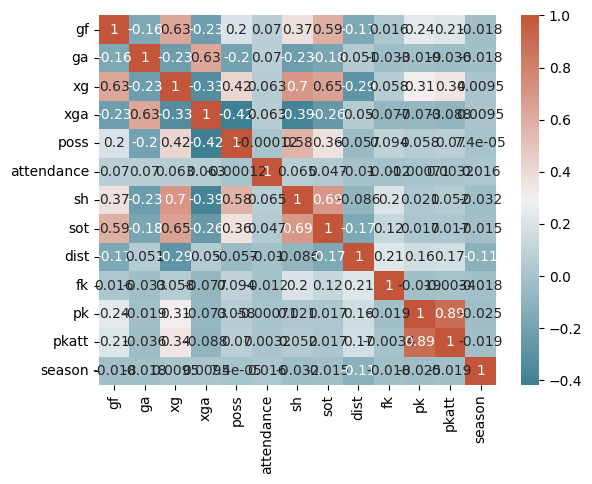

In [10]:
import seaborn as sns
corr = matches_df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<Axes: xlabel='team'>

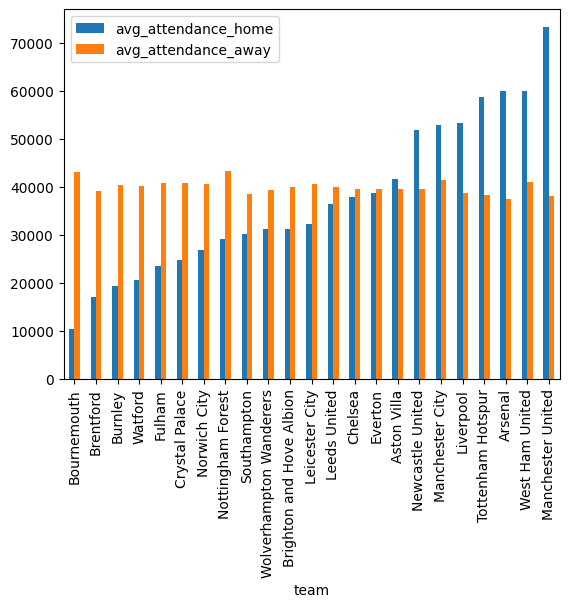

In [11]:
#Finding average number of attendance at home/away to see which team has highest attendance and which venue is the fans most likely go to
attendance = matches_df[['team', 'venue', 'attendance', 'result']]
attendance = attendance.dropna()

avg_attendance = pd.DataFrame(columns=['avg_attendance_home', 'avg_attendance_away'])
avg_attendance['avg_attendance_home'] = attendance[attendance['venue'] == 'Home'].groupby('team')['attendance'].mean()
avg_attendance['avg_attendance_away'] = attendance[attendance['venue'] == 'Away'].groupby('team')['attendance'].mean()
avg_attendance = avg_attendance.sort_values(by='avg_attendance_home')

avg_attendance.plot(kind='bar')



> The highest average attendance is for Manchester United at home with about 70000 attendance. The average attendance count at home is much higher than away, but in terms of teams, only 8 of the big clubs have higher average home attendance. This also depends on the following of the clubs where populars clubs such as **Manchester United, Arsenal, Tottenham Hotspur, Liverpool,  Manchester City, West Ham, and Newcastle United** have large fanbase so they are most likely to attend both home and away games, thus explaining smaller clubs having higher away games most likely have supporters coming from these big clubs to play against their opposition's team home stadium.






In [12]:
#Finding Average Goals Scored for each team
matches_df.groupby(['team', 'opponent'])['gf', 'ga'].mean()

<ipython-input-12-6b80a2617f28>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  matches_df.groupby(['team', 'opponent'])['gf', 'ga'].mean()


gf        ga
team                    opponent                           
Arsenal                 Aston Villa      2.500000  1.000000
                        Bournemouth      3.000000  1.000000
                        Brentford        1.500000  1.000000
                        Brighton         1.666667  1.333333
                        Burnley          0.500000  0.000000
...                                           ...       ...
Wolverhampton Wanderers Nott'ham Forest  1.000000  0.000000
                        Southampton      1.750000  0.500000
                        Tottenham        0.750000  0.500000
                        Watford          3.000000  0.000000
                        West Ham         0.500000  0.750000

[488 rows x 2 columns]

In [13]:
#find rolling average
grouped_matches = matches_df.groupby('team')
group = grouped_matches.get_group("Manchester City")

def rolling_averages(group, cols, new_cols):
  group = group.sort_values('date')
  rolling_stats = group[cols].rolling(3,closed='left').mean()
  group[new_cols] = rolling_stats
  group = group.dropna(subset=new_cols)
  return group

In [14]:
teams_xg = matches_df[['date', 'team', 'opponent', 'xg', 'xga']]

cols = ['xg', 'xga']
new_cols = ['xg_rolling', 'xga_rolling']
matches_xg_rolling = teams_xg.groupby('team').apply(lambda x: rolling_averages(x, cols, new_cols))
matches_xg_rolling

date                     team  \
team                                                             
Arsenal                 4  2021-09-11                  Arsenal   
                        5  2021-09-18                  Arsenal   
                        7  2021-09-26                  Arsenal   
                        8  2021-10-02                  Arsenal   
                        9  2021-10-18                  Arsenal   
...                               ...                      ...   
Wolverhampton Wanderers 29 2023-02-24  Wolverhampton Wanderers   
                        30 2023-03-01  Wolverhampton Wanderers   
                        31 2023-03-04  Wolverhampton Wanderers   
                        32 2023-03-12  Wolverhampton Wanderers   
                        33 2023-03-18  Wolverhampton Wanderers   

                                  opponent   xg  xga  xg_rolling  xga_rolling  
team                                                                           
Arsenal                 4     Norwich City  2.7  0.7    0.600000     2.900000  
                        5          Burnley  1.1  1.0    1.066667     2.733333  
                        7        Tottenham  1.1  1.0    1.333333     2.033333  
                        8         Brighton  0.4  1.1    1.633333     0.900000  
                        9   Crystal Palace  1.7  0.7    0.866667     1.033333  
...                                    ...  ...  ...         ...          ...  
Wolverhampton Wanderers 29          Fulham  0.8  0.5    1.366667     1.333333  
                        30       Liverpool  0.8  2.6    0.966667     0.900000  
                        31       Tottenham  0.5  1.2    0.966667     1.400000  
                        32   Newcastle Utd  1.1  1.8    0.700000     1.433333  
                        33    Leeds United  2.7  1.6    0.800000     1.866667  

[1233 rows x 7 columns]

In [15]:
import datetime
matches_xg_rolling['month'] = pd.DatetimeIndex(matches_xg_rolling['date']).month
matches_xg_rolling

date                     team  \
team                                                             
Arsenal                 4  2021-09-11                  Arsenal   
                        5  2021-09-18                  Arsenal   
                        7  2021-09-26                  Arsenal   
                        8  2021-10-02                  Arsenal   
                        9  2021-10-18                  Arsenal   
...                               ...                      ...   
Wolverhampton Wanderers 29 2023-02-24  Wolverhampton Wanderers   
                        30 2023-03-01  Wolverhampton Wanderers   
                        31 2023-03-04  Wolverhampton Wanderers   
                        32 2023-03-12  Wolverhampton Wanderers   
                        33 2023-03-18  Wolverhampton Wanderers   

                                  opponent   xg  xga  xg_rolling  xga_rolling  \
team                                                                            
Arsenal                 4     Norwich City  2.7  0.7    0.600000     2.900000   
                        5          Burnley  1.1  1.0    1.066667     2.733333   
                        7        Tottenham  1.1  1.0    1.333333     2.033333   
                        8         Brighton  0.4  1.1    1.633333     0.900000   
                        9   Crystal Palace  1.7  0.7    0.866667     1.033333   
...                                    ...  ...  ...         ...          ...   
Wolverhampton Wanderers 29          Fulham  0.8  0.5    1.366667     1.333333   
                        30       Liverpool  0.8  2.6    0.966667     0.900000   
                        31       Tottenham  0.5  1.2    0.966667     1.400000   
                        32   Newcastle Utd  1.1  1.8    0.700000     1.433333   
                        33    Leeds United  2.7  1.6    0.800000     1.866667   

                            month  
team                               
Arsenal                 4       9  
                        5       9  
                        7       9  
                        8      10  
                        9      10  
...                           ...  
Wolverhampton Wanderers 29      2  
                        30      3  
                        31      3  
                        32      3  
                        33      3  

[1233 rows x 8 columns]

In [16]:

home_df = teams_xg.copy()
home_df = home_df.melt(id_vars = ["date", "team", "opponent"])
home_df["venue"] = "H"
home_df.replace({"variable":{"xg":"xG_for", "xga":"xG_ag"}}, inplace = True)
home_df

away_df = teams_xg.copy()
away_df = away_df.melt(id_vars = ["date", "team", "opponent"])
away_df["venue"] = "A"
away_df.replace({"variable":{"xg":"xG_for", "xga":"xG_ag"}}, inplace = True)

xg_df = pd.concat([home_df, away_df]).reset_index(drop = True)

xg_df.head()

,date,team,opponent,variable,value,venue
0,2023-03-19,Arsenal,Crystal Palace,xG_for,1.6,H
1,2023-03-19,Manchester United,Brighton,xG_for,NaN,H
2,2023-03-19,Crystal Palace,Arsenal,xG_for,0.8,H
3,2023-03-19,Brighton and Hove Albion,Manchester Utd,xG_for,NaN,H
4,2023-03-18,Everton,Chelsea,xG_for,1.2,H


<ipython-input-17-7a24773e7507>:18: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date', 'opponent', 'team', 'variable', 'venue'], dtype='object')
  Y_for = Y_for.rolling(window = 10, min_periods = 0).mean()
<ipython-input-17-7a24773e7507>:19: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date', 'opponent', 'team', 'variable', 'venue'], dtype='object')
  Y_ag = Y_ag.rolling(window = 10, min_periods = 0).mean()


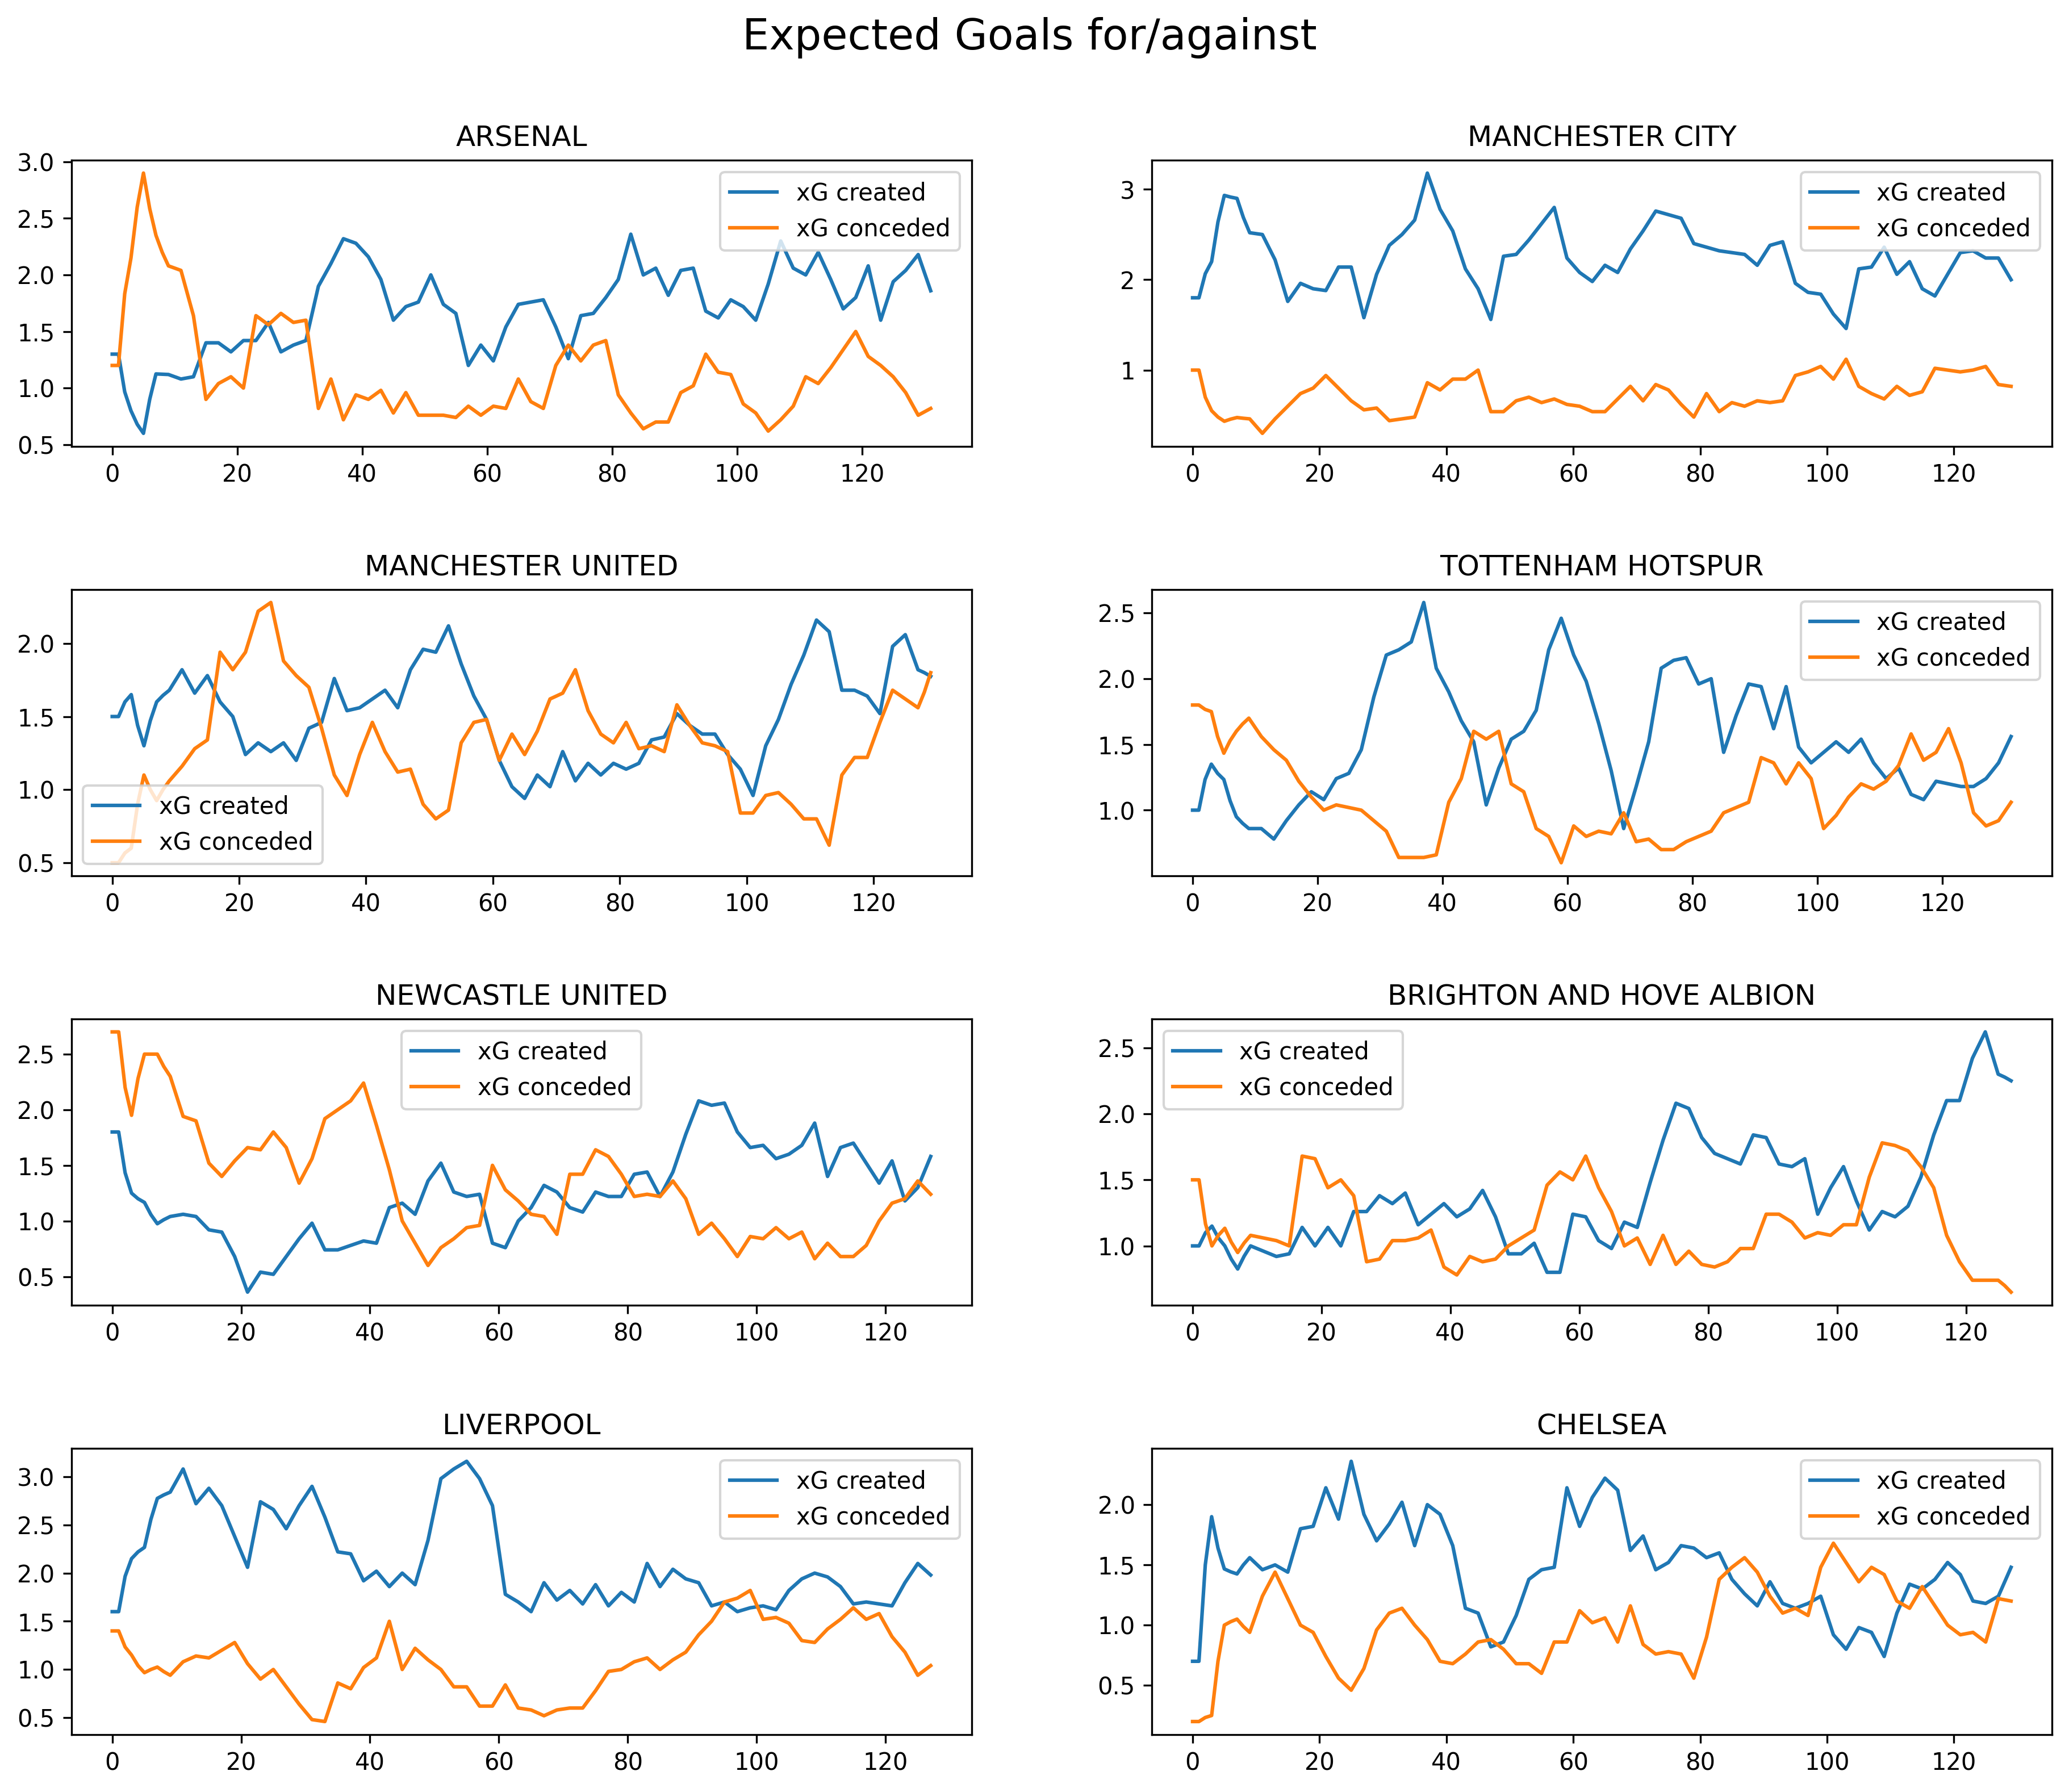

In [17]:
plt.figure(figsize=(15, 12), dpi = 300)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Expected Goals for/against", fontsize=18, y=0.95)

teams = ['Arsenal', 'Manchester City', 'Manchester United', 'Tottenham Hotspur', 'Newcastle United', 'Brighton and Hove Albion', 'Liverpool', 'Chelsea']

for i, team in enumerate(teams):
  expected_goals = xg_df[xg_df["team"] == team].reset_index(drop=True)
  expected_goals = expected_goals.sort_values(by = "date")
  expected_goals = expected_goals.drop_duplicates()

  Y_for = expected_goals[expected_goals["variable"] == "xG_for"].reset_index(drop = True)
  Y_ag = expected_goals[expected_goals["variable"] == "xG_ag"].reset_index(drop = True)
  X = pd.Series(range(len(Y_for)))

  # # Compute the rolling average (min_periods is used for the partial average)
  # # Here we're using a 10 game rolling average
  Y_for = Y_for.rolling(window = 10, min_periods = 0).mean()
  Y_ag = Y_ag.rolling(window = 10, min_periods = 0).mean()

  ax = plt.subplot(4, 2, i + 1)

  ax.plot(X, Y_for, label = "xG created")
  ax.plot(X, Y_ag, label = "xG conceded")

  ax.set_title(team.upper())
  ax.set_xlabel("")
  ax.legend()

  


<ipython-input-100-92543648c6ea>:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  shots_df_by_team = shots_df.groupby('team')['sh', 'sot', 'dist', 'fk', 'pk', 'pkatt'].mean()


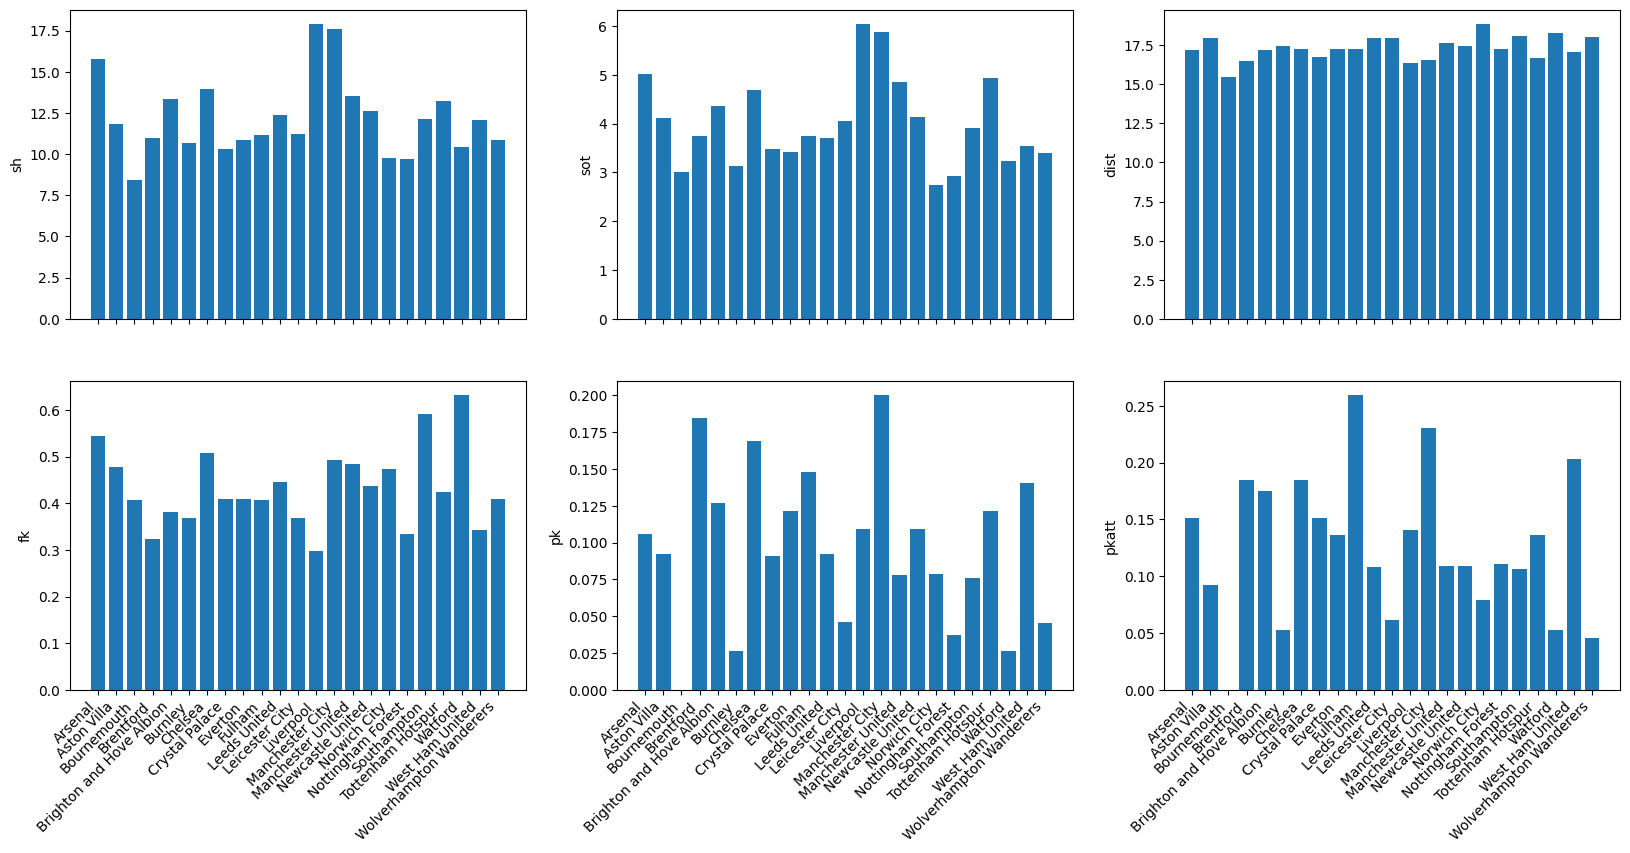

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [100]:
#Analysing shots
#sh - shots total
#sot - shots on target
#dist - average shot distance
#fk - shots on free kick
#pk - shots on penalty kick
#pkatt - penalty kicks attempts
import math

#top 8 teams

shots_df = matches_df[['date', 'team', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']]
shots_df = shots_df.dropna()
shots_df_by_team = shots_df.groupby('team')['sh', 'sot', 'dist', 'fk', 'pk', 'pkatt'].mean()
shots_df_by_team
numeric_features=[ x for x in shots_df_by_team.columns if shots_df_by_team[x].dtype!="object"]

i,j=0,0
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(len(shots_df_by_team.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 10))

for col in shots_df_by_team[numeric_features].columns:
    plt.figure(figsize=(20,10))
    axs[i][j].bar(shots_df_by_team.index, shots_df_by_team[col])
    axs[i][j].set_ylabel(col)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0

fig.autofmt_xdate(rotation=45)
plt.show()






## Problem Statement: 
Perform predictive analysis to predict the **outcome** and **scores** of the upcoming football matches, and find the probability of a team scoring goals.

**Predicting Scores in Football**

There are several models to look into for score prediction, the most common statistical model being the Poisson Regression Model.

Poisson Regression Model: This model is based on the Poisson distribution and is commonly used to predict the number of goals scored by each team in a football match.



To apply the poisson regression formula:

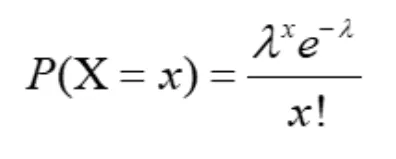

As we can see in the formula above. 
The Poisson distribution requires 2 inputs lambda and x. 

- Lambda: the median of goals of a home/away team. 
- X: the number of goals in a match that could be scored by Team A or Team B.

## Creating a Model
To predict the winner of a match, we need to calculate a team's strength within a league, some of the factors could be:

- The Average Home/Away Goals Scored and Conceded
- The Average XG vs Actual Goals Scored
- The Last N Games Won/Lost/Drawn at home or away


##Predicting Points based on the Average Home/Away Goals Scored and Conceded


In [8]:
class MissingDict(dict):
    __missing__ = lambda self, key: key

map_values = {"Brighton and Hove Albion": "Brighton", 
              "Manchester United": "Manchester Utd", 
              "Newcastle United": "Newcastle Utd", 
              "Tottenham Hotspur": "Tottenham", 
              "West Ham United": "West Ham", 
              "Wolverhampton Wanderers": "Wolves",
              "Nottingham Forest": "Nott'ham Forest" } 
mapping = MissingDict(**map_values)

matches_df["team"] = matches_df["team"].map(mapping)
matches_df["opponent"] = matches_df["opponent"].map(mapping)


In [9]:
Past_PL_Teams = ['Norwich City', 'Burnley', 'Watford']

In [10]:
def calculate_strength():
  home = matches_df[['date','team', 'ga', 'gf']].rename(columns={
      'team': 'Team',
      'gf': 'HomeScored',
      'ga': 'HomeConceded',
      }).sort_values(by=['date']).groupby(['Team'], as_index=False)['HomeScored', 'HomeConceded'].mean()
  
  away = matches_df[['date','opponent', 'ga', 'gf', 'team']].rename(columns={
    'opponent': 'Team',
    'gf': 'AwayConceded',
    'ga': 'AwayScored',
    }).sort_values(by=['date']).groupby(['Team'], as_index=False)['AwayScored', 'AwayConceded'].mean()
  
  df_league_strength = pd.merge(home, away, on='Team')

  average_home_scored, average_home_conceded = home['HomeScored'].mean(), home['HomeConceded'].mean()
  average_away_scored, average_away_conceded = away['AwayScored'].mean(), away['AwayConceded'].mean()

  df_league_strength['HomeScored'] /= average_home_scored
  df_league_strength['HomeConceded'] /= average_home_conceded
  df_league_strength['AwayScored'] /= average_away_scored
  df_league_strength['AwayConceded'] /= average_away_conceded

  df_league_strength.set_index('Team', inplace=True)

  return df_league_strength


In [11]:
df_league_strength = calculate_strength()
df_league_strength

<ipython-input-10-6b0e925740f8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  home = matches_df[['date','team', 'ga', 'gf']].rename(columns={
<ipython-input-10-6b0e925740f8>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  away = matches_df[['date','opponent', 'ga', 'gf', 'team']].rename(columns={


,HomeScored,HomeConceded,AwayScored,AwayConceded
Team,,,,
Arsenal,1.443653,0.777765,1.443653,0.777765
Aston Villa,1.004174,0.992500,1.004174,0.992500
Bournemouth,0.694671,1.387365,0.694671,1.387365
Brentford,1.050343,0.960484,1.050343,0.960484
Brighton,1.047961,0.825813,1.047961,0.825813
Burnley,0.671272,0.967505,0.671272,0.967505
Chelsea,1.211934,0.650994,1.211934,0.650994
Crystal Palace,0.818449,0.882869,0.818449,0.882869
Everton,0.738878,1.114096,0.738878,1.114096


In [ ]:
from scipy.stats import poisson 
def predict_points(home, away):
    if home in df_league_strength.index and away in df_league_strength.index:
        #home_scored * away_conceded
        lamb_home = df_league_strength.at[home,'HomeScored'] * df_league_strength.at[away,'AwayConceded']
        lamb_away = df_league_strength.at[away,'AwayScored'] * df_league_strength.at[home,'HomeConceded']
        prob_home, prob_away, prob_draw = 0, 0, 0
        for x in range(0,11): #number of goals home team
            for y in range(0, 11): #number of goals away team
                p = poisson.pmf(x, lamb_home) * poisson.pmf(y, lamb_away)
                if x == y:
                    prob_draw += p
                elif x > y:
                    prob_home += p
                else:
                    prob_away += p
        
        points_home = 3 * prob_home + prob_draw
        points_away = 3 * prob_away + prob_draw
        return (points_home, points_away)
    else:
        return (0, 0)

In [ ]:
df_league_strength = calculate_strength()

list_points_home = []
list_points_away = []

fixtures = pd.read_csv('/content/drive/MyDrive/Datasets/PL_latest_fixtures.csv', index_col=0)
fixtures.columns = [c.lower() for c in fixtures.columns]
fixtures_table = fixtures[['team', 'date', 'venue', 'opponent']]

for index, row in fixtures.iterrows():
    home, away = row['team'], row['opponent']
    points_home, points_away = predict_points(home, away)
    get_standings.loc[get_standings['home_team'] == home, 'points'] += points_home
    get_standings.loc[get_standings['home_team'] == away, 'points'] += points_away
#     #storing every match result
    list_points_home.append(round(points_home, 1))
    list_points_away.append(round(points_away, 1))
    
get_standings = get_standings.sort_values('points', ascending=False).reset_index()
standings_cp = get_standings[['home_team', 'points']]
standings_cp.round(0)

<ipython-input-214-8ed94c187ef1>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  home = matches_df[['date','team', 'ga', 'gf']].rename(columns={
<ipython-input-214-8ed94c187ef1>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  away = matches_df[['date','opponent', 'ga', 'gf', 'team']].rename(columns={


,home_team,points
0,Manchester City,103.0
1,Arsenal,94.0
2,Liverpool,84.0
3,Fulham,67.0
4,Chelsea,63.0
5,Tottenham,62.0
6,Brentford,59.0
7,Newcastle Utd,58.0
8,Manchester Utd,58.0
9,Aston Villa,57.0


## Finding Average Goals this Season using Poisson Distribution

<ipython-input-245-ce91b2662541>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_szn_data['total_goals'] = current_szn_data['gf'] + current_szn_data['ga']


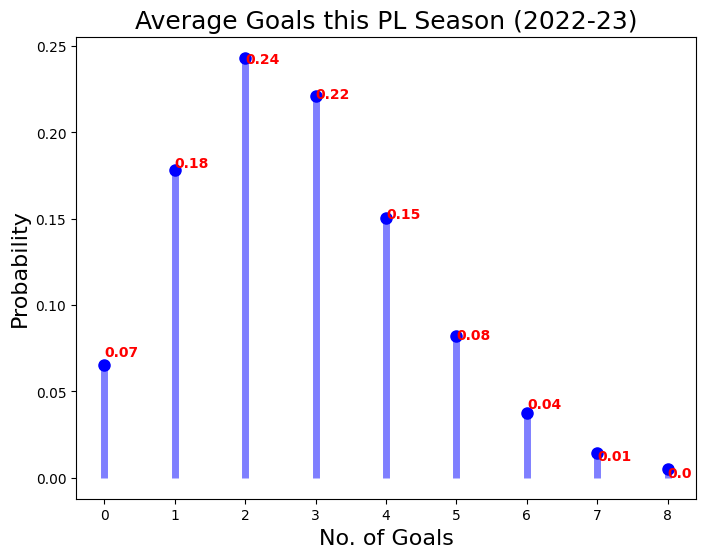

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
X = [0, 1, 2, 3, 4, 5, 6, 7, 8] #no of goals

current_szn_data = matches_df.loc[(matches_df['date'] > '2022-08-01' )]
current_szn_data['total_goals'] = current_szn_data['gf'] + current_szn_data['ga']
current_szn_data.iloc[[current_szn_data.total_goals.argmax()]]

#avg_total_goals
lam = current_szn_data.total_goals.mean()
poisson_pd = poisson.pmf(X, lam)
poisson_pd_round = np.round(poisson_pd, 2)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, poisson_pd, 'bo', ms=8)
plt.ylabel("Probability", fontsize="16")
plt.xlabel("No. of Goals", fontsize="16")
plt.title("Average Goals this PL Season (2022-23)", fontsize="18")
ax.vlines(X, 0, poisson_pd, colors='b', lw=5, alpha=0.5)
for i, v in enumerate(poisson_pd_round):
    ax.text(i, v, str(v), color='red', fontweight='bold')
plt.show()

#Predicting Scores to one on one matches to remaining fixtures

In [ ]:
#Upcoming match: Man City vs Liverpool 
import math

data = current_szn_data[['team', 'opponent', 'gf', 'ga']]

home_total = data[['gf']].sum()
home_average = data[['gf']].mean()

away_total = data[['ga']].sum()
away_average = data[['ga']].mean()


#Man City
mc_home_df = data[data['team'] == "Manchester City"]
mc_home_df

mc_home_total = mc_home_df[['gf']].sum()
mc_home_average = mc_home_df[['gf']].mean()

# print(mc_home_total, mc_home_average)

mc_conceded_total = mc_home_df[['ga']].sum()
mc_conceded_average = mc_home_df[['ga']].mean()

# print(mc_conceded_total, mc_conceded_average)

#Liverpool
lp_away_df = data[data['opponent'] == "Liverpool"]
# lp_away_df

lp_score_total = lp_away_df[['ga']].sum()
lp_score_average = lp_away_df[['ga']].mean()

lp_conceded_total = lp_away_df[['gf']].sum()
lp_conceded_average = lp_away_df[['gf']].mean()

# #Find Attack Strength for each team
mc_attack_str = mc_home_average / home_average
lp_attack_str = lp_score_average / away_average

# #Find Defence Strength for each team
mc_defence_str = mc_conceded_average / away_average
lp_defence_str = lp_conceded_average / home_average

# #Find Expected goals for each team
mc_expect = mc_attack_str * lp_defence_str * home_average
lp_expect = lp_attack_str * mc_defence_str * away_average

# print(mc_expect, lp_expect)


In [ ]:
def poisson_probability(l, x):
    probability = ((l**x) * math.exp(-l)) / math.factorial(x)
    return probability*100

In [ ]:
mc_goals_prob = []
for i in range(6):
    expect = poisson_probability(mc_expect, i)
    mc_goals_prob.append(expect)

X = [0,1,2,3,4,5]
mc_goals_probs = np.round(mc_goals_prob,2)


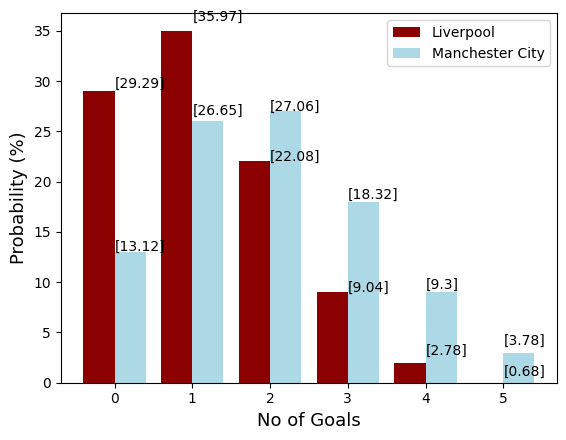

In [ ]:
lp_goals_probs = []
for i in range(6):
    expect = poisson_probability(lp_expect, i)
    lp_goals_probs.append(expect)

X = [0,1,2,3,4,5]
X_axis = np.arange(len(X))
lp_goals_probs = np.round(lp_goals_probs,2)
lp_goals = [int(x) for x in lp_goals_probs]
for i, v in enumerate(lp_goals_probs):
    plt.text(i, v, str(v), color='black')

mc_goals_probs = np.round(mc_goals_probs,2)
mc_goals = [int(x) for x in mc_goals_probs]
for i, v in enumerate(mc_goals_probs):
    plt.text(i, v, str(v), color='black')

plt.bar(X_axis - 0.2 , lp_goals, 0.4, color='darkred', label = 'Liverpool')
plt.bar(X_axis + 0.2, mc_goals, 0.4, color='lightblue', label = 'Manchester City')
plt.ylabel("Probability (%)", fontsize="13")
plt.xlabel("No of Goals", fontsize="13")
plt.legend()


In [ ]:

#Finding Expected Goals per team

matches_results = matches_df[['date', 'team', 'opponent', 'gf', 'ga', 'xg', 'xga', 'venue']].rename(columns={
    'team': 'home_team',
    'opponent': 'away_team',
    'gf': 'home_goals',
    'ga': 'away_goals',
    'xg': 'home_xG',
    'xga': 'away_xG'
})

matches_df.columns

home_xG, away_xG, home_team, away_team, home_goals, away_goals = ([] for i in range(6))

for index, row in matches_results.iterrows():
  match = pd.DataFrame(data=row)
  match = match.T

  home_team_name = match.home_team.iloc[0]
  away_team_name = match.away_team.iloc[0]
  home_team.append(home_team_name)
  away_team.append(away_team_name)

  home_xG.append(float(match.home_xG.iloc[0]))
  away_xG.append(float(match.away_xG.iloc[0]))
  
  home_goals.append(float(row.home_goals))
  away_goals.append(float(row.away_goals))

data = zip(home_team, home_xG, home_goals, away_goals, away_xG, away_team)
results_data = pd.DataFrame(data, columns=['home_team', 'home_xG', 'home_goals', 'away_goals', 'away_xG', 'away_team'])
results_data.home_xG = results_data.home_xG.apply(lambda x: round(x, 2))
results_data.away_xG = results_data.away_xG.apply(lambda x: round(x, 2))

results_data

results_data["home_team"] = results_data["home_team"].map(mapping)
results_data["away_team"] = results_data["away_team"].map(mapping)

results_data

,home_team,home_xG,home_goals,away_goals,away_xG,away_team
0,Arsenal,1.0,2.0,0.0,1.2,Crystal Palace
1,Arsenal,2.7,4.0,2.0,0.5,Leicester City
2,Arsenal,1.3,3.0,0.0,0.3,Bournemouth
3,Arsenal,2.6,2.0,1.0,0.8,Fulham
4,Arsenal,2.4,2.0,1.0,0.4,Aston Villa
...,...,...,...,...,...,...
1297,Norwich City,0.5,0.0,2.0,1.8,Aston Villa
1298,Norwich City,0.8,0.0,4.0,3.0,West Ham
1299,Norwich City,1.1,0.0,3.0,2.0,Leicester City
1300,Norwich City,1.1,1.0,1.0,0.9,Wolves


In [ ]:

fixtures = pd.read_csv('/content/drive/MyDrive/Datasets/PL_latest_fixtures.csv', index_col=0)
fixtures.columns = [c.lower() for c in fixtures.columns]
fixtures_table = fixtures[['team', 'date', 'venue', 'opponent']]

fixtures_table["home_xG"] = 0
fixtures_table["away_xG"] = 0
fixtures_table["home_goals"] = 0
fixtures_table["away_goals"] = 0
fixtures_table["home_games"] = 0
fixtures_table["away_games"] = 0

for i in fixtures_table["team"]:
    home = results_data.loc[results_data["home_team"] == i]
    home_xG = sum(home.home_xG)
    home_goals = sum(home.home_goals)

    away = results_data.loc[results_data["away_team"] == i]
    away_xG = sum(away.away_xG)
    away_goals = sum(away.away_goals)

    fixtures_table["home_xG"].loc[fixtures_table.team == i] = home_xG
    fixtures_table["home_goals"].loc[fixtures_table.team == i] = home_goals

    fixtures_table["away_xG"].loc[fixtures_table.opponent == i] = away_xG
    fixtures_table["away_goals"].loc[fixtures_table.opponent == i] = away_goals

fixtures_table["home_xG"] = fixtures_table["home_xG"].apply(lambda x: round(x, 2))
fixtures_table["away_xG"] = fixtures_table["away_xG"].apply(lambda x: round(x, 2))

fixtures_table


<ipython-input-242-17e7cf10719a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixtures_table["home_xG"] = 0
<ipython-input-242-17e7cf10719a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixtures_table["away_xG"] = 0
<ipython-input-242-17e7cf10719a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,team,date,venue,opponent,home_xG,away_xG,home_goals,away_goals,home_games,away_games
39,Arsenal,2023-04-01,Home,Leeds United,113.9,78.0,127,77,0,0
40,Arsenal,2023-04-09,Away,Liverpool,113.9,136.3,127,141,0,0
41,Arsenal,2023-04-16,Away,West Ham,113.9,0.0,127,0,0,0
42,Arsenal,2023-04-21,Home,Southampton,113.9,72.6,127,66,0,0
43,Arsenal,2023-04-26,Away,Manchester City,113.9,144.6,127,166,0,0
...,...,...,...,...,...,...,...,...,...,...
42,Southampton,2023-04-30,Away,Newcastle Utd,72.6,0.0,66,0,0,0
43,Southampton,2023-05-08,Away,Nott'ham Forest,72.6,0.0,66,0,0,0
44,Southampton,2023-05-13,Home,Fulham,72.6,33.6,66,38,0,0
45,Southampton,2023-05-20,Away,Brighton,72.6,0.0,66,0,0,0


In [ ]:
import datetime as datetime

matches_df_results['date'] = pd.to_datetime(matches_df_results['date'])
matches_df_results['year'] = matches_df_results['date'].dt.year
rec_data= matches_df_results.loc[(matches_df_results['year'] > 2022 )]
# rec_data.iloc[[rec_data.total_goals.argmax()]]

# lam = rec_data.total_goals.mean()

In [ ]:
# Poisson probability is: P(x; μ) = (e-μ) (μx) / x!
#lam =2.49
# from scipy.special import factorial
# import numpy as np
# #k is no. of event we want to find the probability of

# def poisson(k,exp_events):
#     minutes=90
#     lam =(exp_events)
#     p_k= np.exp(-lam)*np.power(lam,k)/factorial(k)

#     print(f'The probability of {k} goals in {minutes} minutes is {100*p_k:.2f}%.')
#     return p_k

# k=[]
# p_k=[]

# for i in range(10):
#     p_k.append(poisson(i,lam)*100)
#     k.append(i)


**Creating Predictors for Machine Learning**
- Possible predictors to be used : venue, day, opposition
- Target: result column (W/D/L) - convert into 0 (D/L) or 1(W)

In [ ]:
matches_df.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                   object
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                     float64
pkatt                  float64
season                   int64
team                    object
dtype: object

In [ ]:
#Creating predictors for machine learning
matches_df['venue_code'] = matches_df['venue'].astype("category").cat.codes
matches_df['opp_code'] = matches_df['opponent'].astype('category').cat.codes
matches_df['hour'] = matches_df['time'].str.replace(":.+", "", regex=True).astype("int")
matches_df['day_code'] = matches_df['date'].dt.dayofweek

In [ ]:
#Set up target we are going to predict Convert Wins to 1, L/D to 0
matches_df['target'] = (matches_df['result'] == 'W').astype('int')
matches_df

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,...,1.0,0.0,0.0,2022,Arsenal,0,7,20,4,1
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,...,0.0,0.0,0.0,2022,Arsenal,1,11,15,5,1
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,...,0.0,0.0,0.0,2022,Arsenal,0,2,17,5,1
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,...,1.0,0.0,0.0,2022,Arsenal,1,9,17,5,1
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,...,1.0,0.0,0.0,2022,Arsenal,1,1,19,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2022-04-30,15:00,Premier League,Matchweek 35,Sat,Away,L,0.0,2.0,Aston Villa,...,0.0,0.0,0.0,2021,Norwich City,0,1,15,5,0
39,2022-05-08,14:00,Premier League,Matchweek 36,Sun,Home,L,0.0,4.0,West Ham,...,1.0,0.0,0.0,2021,Norwich City,1,21,14,6,0
40,2022-05-11,19:45,Premier League,Matchweek 21,Wed,Away,L,0.0,3.0,Leicester City,...,0.0,0.0,0.0,2021,Norwich City,0,11,19,2,0
41,2022-05-15,14:00,Premier League,Matchweek 37,Sun,Away,D,1.0,1.0,Wolves,...,0.0,0.0,0.0,2021,Norwich City,0,22,14,6,0


**Creating Machine Learning Models**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [ ]:
train = matches_df[matches_df['date'] < '2022-08-01'] #Previous Season
test = matches_df[matches_df['date'] > '2022-08-01'] #Current Season
predictors = ['venue_code', 'opp_code', 'hour', 'day_code']

rf.fit(train[predictors], train['target'])


RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [ ]:
preds = rf.predict(test[predictors])

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test["target"], preds)
acc

0.5608856088560885

In [ ]:
combined = pd.DataFrame(dict(actual=test['target'], predictions=preds))


In [ ]:
pd.crosstab(index=combined["actual"], columns=combined['predictions'])

predictions,0,1
actual,,
0,237,100
1,138,67


In [ ]:
from sklearn.metrics import precision_score
precision_score(test['target'], preds)

0.40119760479041916

In [ ]:
#Improving precision scores 
#Split matches by team, compute rolling averages 
grouped_matches = matches_df.groupby('team')

group = grouped_matches.get_group("Manchester City")
group

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,...,1.0,1.0,1.0,2022,Manchester City,0,21,16,6,1
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,...,0.0,0.0,0.0,2022,Manchester City,1,2,15,5,1
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,...,1.0,0.0,0.0,2022,Manchester City,0,15,16,6,0
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,...,0.0,0.0,0.0,2022,Manchester City,1,7,15,5,1
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,...,0.0,0.0,0.0,2022,Manchester City,1,17,19,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,2022-04-30,17:30,Premier League,Matchweek 35,Sat,Away,W,4.0,0.0,Leeds United,...,0.0,0.0,0.0,2021,Manchester City,0,10,17,5,1
54,2022-05-08,16:30,Premier League,Matchweek 36,Sun,Home,W,5.0,0.0,Newcastle Utd,...,1.0,0.0,0.0,2021,Manchester City,1,15,16,6,1
55,2022-05-11,20:15,Premier League,Matchweek 33,Wed,Away,W,5.0,1.0,Wolves,...,0.0,0.0,0.0,2021,Manchester City,0,22,20,2,1
56,2022-05-15,14:00,Premier League,Matchweek 37,Sun,Away,D,2.0,2.0,West Ham,...,2.0,0.0,1.0,2021,Manchester City,0,21,14,6,0


In [ ]:
def rolling_averages(group, cols, new_cols):
  group = group.sort_values('date')
  rolling_stats = group[cols].rolling(3,closed='left').mean()
  group[new_cols] = rolling_stats
  group = group.dropna(subset=new_cols)
  return group


In [ ]:
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]



In [ ]:
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [ ]:
rolling_averages(group, cols, new_cols)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,5,1,3.333333,0.333333,19.666667,6.000000,16.866667,0.666667,0.000000,0.000000
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,5,0,3.666667,0.000000,22.000000,7.333333,15.866667,0.333333,0.000000,0.000000
8,2021-09-25,12:30,Premier League,Matchweek 6,Sat,Away,W,1.0,0.0,Chelsea,...,5,1,2.000000,0.000000,22.000000,6.333333,15.166667,0.333333,0.000000,0.000000
10,2021-10-03,16:30,Premier League,Matchweek 7,Sun,Away,D,2.0,2.0,Liverpool,...,6,0,0.666667,0.000000,18.666667,4.000000,15.933333,0.333333,0.000000,0.000000
11,2021-10-16,15:00,Premier League,Matchweek 8,Sat,Home,W,2.0,0.0,Burnley,...,5,1,1.000000,0.666667,14.333333,2.333333,16.833333,0.666667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2023-02-15,19:30,Premier League,Matchweek 12,Wed,Away,W,3.0,1.0,Arsenal,...,2,1,2.000000,0.666667,14.333333,5.666667,15.966667,0.666667,0.666667,0.666667
35,2023-02-18,15:00,Premier League,Matchweek 24,Sat,Away,D,1.0,1.0,Nott'ham Forest,...,5,0,2.000000,1.000000,13.333333,5.666667,15.066667,0.666667,0.333333,0.333333
37,2023-02-25,17:30,Premier League,Matchweek 25,Sat,Away,W,4.0,1.0,Bournemouth,...,5,1,2.333333,1.000000,16.000000,6.000000,15.166667,1.000000,0.333333,0.333333
39,2023-03-04,12:30,Premier League,Matchweek 26,Sat,Home,W,2.0,0.0,Newcastle Utd,...,5,1,2.666667,1.000000,17.333333,5.333333,15.133333,1.000000,0.000000,0.000000


In [ ]:
matches_rolling = matches_df.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [ ]:
matches_rolling

date   time            comp         round  \
team                                                                         
Arsenal                 4  2021-09-11  15:00  Premier League   Matchweek 4   
                        5  2021-09-18  15:00  Premier League   Matchweek 5   
                        7  2021-09-26  16:30  Premier League   Matchweek 6   
                        8  2021-10-02  17:30  Premier League   Matchweek 7   
                        9  2021-10-18  20:00  Premier League   Matchweek 8   
...                               ...    ...             ...           ...   
Wolverhampton Wanderers 29 2023-02-24  20:00  Premier League  Matchweek 25   
                        30 2023-03-01  20:00  Premier League   Matchweek 7   
                        31 2023-03-04  15:00  Premier League  Matchweek 26   
                        32 2023-03-12  16:30  Premier League  Matchweek 27   
                        33 2023-03-18  15:00  Premier League  Matchweek 28   

                            day venue result   gf   ga        opponent  ...  \
team                                                                    ...   
Arsenal                 4   Sat  Home      W  1.0  0.0    Norwich City  ...   
                        5   Sat  Away      W  1.0  0.0         Burnley  ...   
                        7   Sun  Home      W  3.0  1.0       Tottenham  ...   
                        8   Sat  Away      D  0.0  0.0        Brighton  ...   
                        9   Mon  Home      D  2.0  2.0  Crystal Palace  ...   
...                         ...   ...    ...  ...  ...             ...  ...   
Wolverhampton Wanderers 29  Fri  Away      D  1.0  1.0          Fulham  ...   
                        30  Wed  Away      L  0.0  2.0       Liverpool  ...   
                        31  Sat  Home      W  1.0  0.0       Tottenham  ...   
                        32  Sun  Away      L  1.0  2.0   Newcastle Utd  ...   
                        33  Sat  Home      L  2.0  4.0    Leeds United  ...   

                            day_code  target  gf_rolling  ga_rolling  \
team                                                                   
Arsenal                 4          5       1    0.000000    3.000000   
                        5          5       1    0.333333    2.333333   
                        7          6       1    0.666667    1.666667   
                        8          5       0    1.666667    0.333333   
                        9          0       0    1.333333    0.333333   
...                              ...     ...         ...         ...   
Wolverhampton Wanderers 29         4       0    1.666667    0.666667   
                        30         2       0    1.000000    1.000000   
                        31         5       1    0.333333    1.333333   
                        32         6       0    0.666667    1.000000   
                        33         5       0    0.666667    1.333333   

                           sh_rolling sot_rolling dist_rolling fk_rolling  \
team                                                                        
Arsenal                 4    9.666667    2.333333    14.833333   0.333333   
                        5   12.333333    3.000000    14.133333   0.333333   
                        7   14.666667    3.000000    14.800000   0.666667   
                        8   18.333333    5.333333    18.433333   0.666667   
                        9   11.000000    4.000000    19.833333   0.666667   
...                               ...         ...          ...        ...   
Wolverhampton Wanderers 29  12.666667    3.333333    16.766667   0.000000   
                        30  11.333333    2.333333    16.700000   0.000000   
                        31   9.000000    2.333333    14.133333   0.000000   
                        32   6.666667    2.666667    16.700000   0.000000   
                        33   6.333333    3.333333    17.166667   0.333333   

                           pk_rolling  pkatt_rollin

In [ ]:
matches_rolling = matches_rolling.droplevel('team')


In [ ]:
matches_rolling['team'].value_counts()

Arsenal                     63
Crystal Palace              63
Tottenham Hotspur           63
Southampton                 63
Everton                     63
Wolverhampton Wanderers     63
Chelsea                     62
Aston Villa                 62
Brentford                   62
Manchester City             62
Manchester United           62
Leeds United                62
Leicester City              62
Liverpool                   61
Newcastle United            61
Brighton and Hove Albion    61
West Ham United             61
Burnley                     35
Norwich City                35
Watford                     35
Fulham                      24
Nottingham Forest           24
Bournemouth                 24
Name: team, dtype: int64

In [ ]:
matches_rolling.index = range(matches_rolling.shape[0])

In [ ]:
#Retraining our machine learning models
def make_predictions(data, predictors):
  train = matches_df[matches_df['date'] < '2022-08-01'] #Previous Season
  test = matches_df[matches_df['date'] > '2022-08-01'] #Current Season
  predictors = ['venue_code', 'opp_code', 'hour', 'day_code']

  rf.fit(train[predictors], train['target'])
  preds = rf.predict(test[predictors])
  combined = pd.DataFrame(dict(actual=test['target'], predictions=preds))
  precision = precision_score(test['target'], preds)
  return combined, precision



In [ ]:
combined, error = make_predictions(matches_rolling, predictors + new_cols)
error

0.40119760479041916

In [ ]:
combined = combined.merge(matches_rolling[['date', 'team', 'opponent', 'result']], left_index=True, right_index=True)
combined

,actual,predictions,date,team,opponent,result
0,1,0,2022-08-05,Arsenal,Crystal Palace,W
0,1,0,2022-08-06,Aston Villa,Bournemouth,L
0,1,0,2022-08-07,Brentford,Leicester City,D
0,1,0,2022-08-07,Brighton and Hove Albion,Manchester Utd,W
0,1,0,2022-08-06,Chelsea,Everton,W
...,...,...,...,...,...,...
45,0,0,2022-04-10,Leicester City,Crystal Palace,W
45,0,0,2022-03-16,Liverpool,Arsenal,W
45,0,0,2022-04-28,Manchester United,Chelsea,D
45,0,0,2023-03-19,Manchester United,Brighton,NaN


In [ ]:
#Combining home and away predictions
class MissingDict(dict):
    __missing__ = lambda self, key: key

map_values = {"Brighton and Hove Albion": "Brighton", 
              "Manchester United": "Manchester Utd", 
              "Newcastle United": "Newcastle Utd", 
              "Tottenham Hotspur": "Tottenham", 
              "West Ham United": "West Ham", 
              "Wolverhampton Wanderers": "Wolves",
              "Nottingham Forest": "Nott'ham Forest" } 
mapping = MissingDict(**map_values)


In [ ]:
combined["new_team"] = combined["team"].map(mapping)


In [ ]:
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])
merged.head()

,actual_x,predictions_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predictions_y,team_y,opponent_y,result_y,new_team_y
0,1,0,2022-08-05,Arsenal,Crystal Palace,W,Arsenal,1,0,Crystal Palace,Arsenal,L,Crystal Palace
1,1,0,2022-08-05,Arsenal,Crystal Palace,W,Arsenal,0,0,Crystal Palace,Arsenal,L,Crystal Palace
2,1,0,2022-08-05,Arsenal,Crystal Palace,W,Arsenal,1,1,Crystal Palace,Arsenal,L,Crystal Palace
3,1,0,2022-08-05,Arsenal,Crystal Palace,W,Arsenal,1,1,Crystal Palace,Arsenal,L,Crystal Palace
4,1,0,2022-08-05,Arsenal,Crystal Palace,W,Arsenal,1,0,Crystal Palace,Arsenal,L,Crystal Palace
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223283,0,0,2022-04-03,Tottenham Hotspur,Newcastle Utd,W,Tottenham,0,0,Newcastle United,Tottenham,L,Newcastle Utd
223284,0,0,2022-04-03,Tottenham Hotspur,Newcastle Utd,W,Tottenham,0,1,Newcastle United,Tottenham,L,Newcastle Utd
223285,0,0,2022-04-03,Tottenham Hotspur,Newcastle Utd,W,Tottenham,0,1,Newcastle United,Tottenham,L,Newcastle Utd
223286,0,0,2022-04-03,Tottenham Hotspur,Newcastle Utd,W,Tottenham,0,0,Newcastle United,Tottenham,L,Newcastle Utd


In [ ]:
merged[(merged["predictions_x"] == 1) & (merged["predictions_y"] ==0)]["actual_x"].value_counts()


0    28533
1    17473
Name: actual_x, dtype: int64

In [ ]:
28533 / (28533+17473)

0.620201712820067

- use more columns - to generate predictions
- non linear tendencies - models
- current teams record of whole season vs opponent